<a href="https://colab.research.google.com/github/christitensor/FIN5330/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Finance 6470: Final Exam__

<br>

Finance 6470: Derivatives Markets <br>
Tyler J. Brough <br>
Last Updated: April 11, 2019 <br>
<br>
<br>

## Numerical Workout Problems

<br>


**1.** Let $S = \$100$, $K = \$95$, $r = 8\%$ (continuously compounded), $\sigma = 30\%$, $\delta = 0$, $T = 1$ year, and $n = 3$ (binomial periods).
  
* What is the price for an American call option?
* What is the price for a European call option? What do you conclude about early exercise for the American call option?
* What is the price for a European put option? Is put-call parity satisfied?
* What is the price for an America put option?

<br>

In [0]:
spot = 100
strike = 95
rate = .08
volatility = .3
dividend = 0
expiry = 1
steps = 3

In [0]:
!pip install git+https://github.com/broughtj/probo

  Cloning https://github.com/broughtj/probo to /tmp/pip-req-build-1fb68yqb
  Running command git clone -q https://github.com/broughtj/probo /tmp/pip-req-build-1fb68yqb
  Stored in directory: /tmp/pip-ephem-wheel-cache-nb0r6d7d/wheels/11/00/86/6889e33657baa255d04ac44e5bd56883d7c92afd2aa1588a1b
Successfully built probo


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from probo.marketdata import MarketData
from probo.payoff import VanillaPayoff, call_payoff, put_payoff
from probo.engine import BinomialPricingEngine, AmericanBinomialPricer, EuropeanBinomialPricer, BlackScholesPricingEngine, BlackScholesPricer
from probo.facade import OptionFacade

In [0]:
thedata = MarketData(rate, spot, volatility, dividend)
thecall = VanillaPayoff(expiry, strike, call_payoff)
theput = VanillaPayoff(expiry, strike, put_payoff)
def priceoption(putorcall, style):
  pricer = style
  binomengine = BinomialPricingEngine(steps, pricer)
  option1 = OptionFacade(putorcall, binomengine, thedata )
  price1 = option1.price()
  print("The call price via", style, " is: {0:.3f}".format(price1))

In [0]:
priceoption(thecall, AmericanBinomialPricer)

The call price via <function AmericanBinomialPricer at 0x7ff2410b8400>  is: 18.283


In [0]:
priceoption(thecall, EuropeanBinomialPricer)

The call price via <function EuropeanBinomialPricer at 0x7ff26465a9d8>  is: 18.283


In [0]:
priceoption(theput, EuropeanBinomialPricer)

The call price via <function EuropeanBinomialPricer at 0x7ff26465a9d8>  is: 5.979


Since the price is the same for the American and European, I would assume early excersise would not be any more beneficial.

In [0]:
binomengine = BinomialPricingEngine(steps,EuropeanBinomialPricer)
option1 = OptionFacade(theput, binomengine, thedata)
price1 = option1.price()
option2 = OptionFacade(thecall, binomengine, thedata)
price2 = option2.price()

strikepv = strike * np.exp(-rate*1)
callside = price2 + strikepv
putside = spot + price1
if callside == putside:
  print('The put-call parity holds')
else:
  print('The put-call parity holds')

The put-call parity holds


In [0]:
priceoption(theput, AmericanBinomialPricer)

The call price via <function AmericanBinomialPricer at 0x7ff2410b8400>  is: 6.678


**2.** Make the same assumptions as in the previous problem, except let $\delta = 0.03$.

* Price an American call option with $n = 200$ binomial periods. 
* Now price a European call option using the Black-Scholes-Merton model.
* Compare the different results. 

<br>

In [0]:
steps = 200
dividneds = .03
thedata = MarketData(rate,spot,volatility, dividend)

In [0]:
priceoption(thecall, AmericanBinomialPricer)

The call price via <function AmericanBinomialPricer at 0x7fc3d48661e0>  is: 18.382


In [0]:
bsengine = BlackScholesPricingEngine("call", BlackScholesPricer)
option3 = OptionFacade(thecall, bsengine, thedata)
price3 = option3.price()
print("The Call price via Black-Scholes is: {0:.3f}".format(price3))

The Call price via Black-Scholes is: 18.387


We came up with two very similar prices. 

In [0]:
steps = 2000
priceoption(thecall, AmericanBinomialPricer)

The call price via <function AmericanBinomialPricer at 0x7fc3d48661e0>  is: 18.387


As you can see, if we up the number of steps, we get a price identical to that of the black scholes model.

## Computational Problems

**3.** The binomial model of underlying asset price dynamics is given as follows (see McDonald Chapter 11):

$$
S_{t+h} = S_{t} e^{(r - \delta)h \pm \sigma\sqrt{h}}
$$
Assume the following data and parameters are given:

* $S_{0} = \$100$
* $r = 6\%$ 
* $\sigma = 30\%$
* $T = 5$ years
* $h = 0.01$

<br>

Simulate 500 steps in a path and plot the results below.

<br>

In [0]:
## Simulate 500 Steps
spot = 100.0
rate = .06
volatility = .3
expiry = 5
h  = 1/253
T = 5
steps = 500
u = np.exp(((rate - dividend) * h) + volatility * np.sqrt(h)) 
d = np.exp(((rate - dividend) * h) - volatility * np.sqrt(h))
pu = (np.exp((rate - dividend) * h) - d) / (u - d)
dividend = 0

#s= np.zeros(steps)
s = np.empty(steps)
s[0] = spot
for t in range(1, steps):
  w = np.random.uniform(size = 1)
  if w >= pu:
    s[t] = s[t-1] * u
  else:
    s[t] = s[t-1] * d
 # s[t] = s[t-1] * np.exp((rate - dividend)*h + volatility * np.sqrt(h))
binomprice1= pd.Series(s)


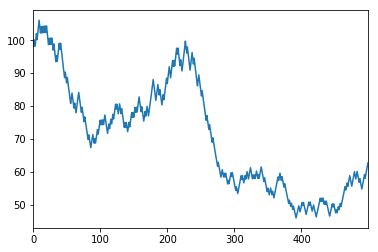

In [0]:
#ts = pd.Series(test)
binomprice1.plot()

<br>
<br>

Now repeat this process 1,000 times and store only the resulting terminal price for each simulated path. Plot a histogram for these resulting terminal prices. Comment on the shape of the histogram. 

<br>
<br>

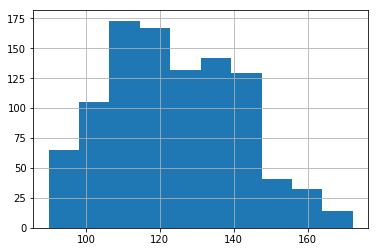

In [0]:
## Histogram of terminal prices 
steps = 1000
s = np.empty(steps)
s[0] = spot
for t in range(1, steps):
  w = np.random.uniform(size = 1)
  if w >= pu:
    s[t] = s[t-1] * u
  else:
    s[t] = s[t-1] * d
 # s[t] = s[t-1] * np.exp((rate - dividend)*h + volatility * np.sqrt(h))
binomprice2= pd.Series(s)

binomprice2.hist()

In [0]:
binomprice2.describe()

count    1000.000000
mean      123.952931
std        17.605843
min        89.858855
25%       110.587903
50%       122.534297
75%       137.772226
max       172.284783
dtype: float64

The histogram appears to be heavily skewed to the left. This leads me to believe that we have quite a few low prices pulling our histogram

**4.** Now let's rearrange this original formula into a statment about returns (see McDonald Chapter 11).

$$
\ln{\left(S_{t+h} / S_{t}\right)} = (r - \delta)h \pm \sigma\sqrt{h}
$$

<br>
<br>

Similar to the exercise above simulate a sample path with 500 steps and make a plot. Also, simulate the process 1,000 times keeping only the terminal return. Make a histogram of the resulting simulated terminal returns. Comment on the shape of the histogram. 

<br>

In [0]:

## Simulate returns

### your code goes here ###
u = np.exp(((rate - dividend) * h) + volatility * np.sqrt(h)) 
d = np.exp(((rate - dividend) * h) - volatility * np.sqrt(h))
pu = (np.exp((rate - dividend) * h) - d) / (u - d)
steps = 500
ret = np.empty(steps)

for t in range(steps):
  w = np.random.uniform()
  if w >= pu:
    ret[t] =  np.log(u)
  else:
    ret[t] =   np.log(d)
  ret[t] = ret[t] + ret[t - 1]
#solve the equation a little bit 

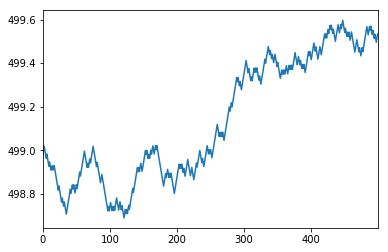

In [0]:
test = pd.Series(ret)
test.plot()

In [0]:
steps = 1000
ret = np.empty(steps)

for t in range(steps):
  w = np.random.uniform()
  if w>= pu:
    ret[t] = np.log(u)
  else:
    ret[t] = np.log(d)
  ret[t] = ret[t] + ret[t - 1]

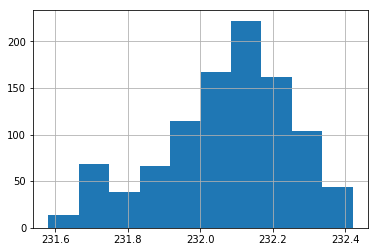

In [0]:
step1000 = pd.Series(ret)
step1000.hist()

The histogram appears to be approxamately normal, giving me confidence in the returns. This is exactly what we should find. 

**5.** The Black-Scholes-Merton model assumes that the underlying asset price follows geometric Brownian motion as follows:

<br>

$$
S_{t+h} = S_{t} e^{(r - \delta - \frac{1}{2}\sigma^{2})h + \sigma \sqrt{h} Z}
$$
where $Z \sim N(0,1)$. Assume the following:

* $S_{0} = \$40.0$
* $K = \$40.0$
* $r = 8\%$
* $\sigma = 30\%$
* $T = 91/365$ days
* $\delta = 0.0$

<br>

Simulate prices for 10 days and calculate mark-to-market profits/losses for the delta-hedged position on a written put option. Explain the results.

<br>

In [0]:
## Simulate delta hedging

### your code goes here ###
from scipy.stats import norm

In [0]:
def bsmCall(S, K, v, r, t, q):
    d1 = ((np.log(S/K) + (r - q + 0.5 * v * v)*t) / (v * np.sqrt(t)))
    d2 = d1 - v * np.sqrt(t)
    prc = S * np.exp(-q * t) * norm.cdf(d1) - K * np.exp(-r * t) * norm.cdf(d2)
    
    return prc

In [0]:
def bsmPut(S,K,v,r,t,q):
    d1 = ((np.log(S/K) + (r - q + 0.5 * v * v)*t) / (v * np.sqrt(t)))
    d2 = d1 - v * np.sqrt(t)
    prc = K * np.exp(-r * t) * norm.cdf(-d2) - S * np.exp(-q * t) * norm.cdf(-d1)
    
    return prc

In [0]:
def bsmCallDelta(S, K, v, r, t, q):
    d1 = ((np.log(S/K) + (r - q + 0.5 * v * v)*t) / (v * np.sqrt(t)))
    delta = np.exp(-q * t) * norm.cdf(d1) 
    
    return delta

In [0]:
def bsmPutDelta(S, K, v, r, t, q):
    d1 = ((np.log(S/K) + (r - q + 0.5 * v * v)*t) / (v * np.sqrt(t)))
    delta = np.exp(-q * t) * norm.cdf(-d1) 
    
    return delta

In [0]:
def bsmGamma(S, K, v, r, t, q):
    d1 = ((np.log(S/K) + (r - q + 0.5 * v * v)*t) / (v * np.sqrt(t)))
    gamma = (np.exp(-q * t) * norm.pdf(d1)) / (S * v * np.sqrt(t))
    
    return gamma

In [0]:
S = 40.0
K = 40.0
v = 0.30
r = 0.08
tau = 91/365
q = 0.0

callPrc = bsmCall(S, K, v, r, tau, q)
callDelta = bsmCallDelta(S, K, v, r, tau, q)
callGamma = bsmGamma(S, K, v, r, tau, q)
print(f"The Call Price: {callPrc : 0.4f}")
print(f"The Call Delta: {callDelta : 0.4f}")
print(f"The Call Gamma: {callGamma : 0.4f}")

The Call Price:  2.7804
The Call Delta:  0.5824
The Call Gamma:  0.0652


In [0]:
class MarketMaker(object):
    def __init__(self, spot, strike, vol, rate, expiry, div, pricer, delta):
        self.__spot = spot
        self.__strike = strike
        self.__vol = vol
        self.__rate = rate
        self.__expiry = expiry
        self.__dt = 1/365
        self.__div = div
        self.__pricer = pricer
        self.__delta = delta
        self.__units = 100.0
        self.__option = self.__units * self.__pricer(self.__spot, self.__strike, self.__vol, self.__rate, self.__expiry, self.__div)
        self.__option_delta = self.__units * self.__delta(self.__spot, self.__strike, self.__vol, self.__rate, self.__expiry, self.__div)
        self.__market_value = self.__option_delta * self.__spot - self.__option
        self.__interest = 0.0
        self.__capital_gain = 0.0
        self.__profit = 0.0
              
    def show(self):
        print("Stock ($): \t\t{0:.2f}".format(self.__spot))
        print("Option ($): \t\t{0:.2f}".format(self.__option))
        print("100 x Delta: \t\t{0:.2f}".format(self.__option_delta))
        print("Investment ($): \t{0:0.2f}".format(self.__market_value))
        print("Interest ($): \t\t{0:0.2f}".format(self.__interest))
        print("Capital Gain ($): \t{0:0.2f}".format(self.__capital_gain))
        print("Daily Profit ($): \t{0:0.2f}".format(self.__profit))
        print("\n")

    def update(self, spot):
        mktVal = self.__market_value
        optDelta = self.__option_delta
        self.__interest = -(np.exp(self.__rate / 365) - 1.0) * mktVal
        self.__spot = spot
        self.__expiry -= self.__dt
        self.__option = self.__units * self.__pricer(self.__spot, self.__strike, self.__vol, self.__rate, self.__expiry, self.__div)
        self.__option_delta = self.__units * self.__delta(self.__spot, self.__strike, self.__vol, self.__rate, self.__expiry, self.__div)
        self.__market_value = self.__option_delta * self.__spot - self.__option
        self.__capital_gain = self.__market_value - mktVal - (spot * (self.__option_delta - optDelta))
        self.__profit = self.__market_value - mktVal - (spot * (self.__option_delta - optDelta)) + self.__interest

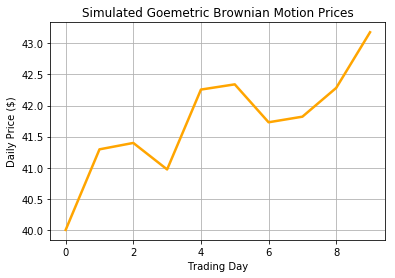

In [0]:
a = r
dt = 1.0/253.0
N = 10
z = np.random.normal(size=N)
nudt = (a - q - 0.5 * v * v) * dt
sigdt = (v * np.sqrt(dt))

path = np.zeros(N)
path[0] = S

for t in range(1,N):
    path[t] = path[t-1] * np.exp(nudt + sigdt * z[t])

## plot the simulated returns path
fig, ax = plt.subplots()
#ax.plot_date(r, linestyle='--')
ax.grid(True)
plt.title("Simulated Goemetric Brownian Motion Prices")
plt.ylabel("Daily Price ($)")
plt.xlabel("Trading Day")
plt.plot(path, linewidth=2.5, color="orange")
plt.show()

In [0]:
## See McDonald 3rd pp. 386, Table 13.2
#spot_t = [40.50, 39.25, 38.75, 40.0, 40.0]
import random 
#spot_t = random.sample(range(35,45),10)
spot_t = path
mm = MarketMaker(S, K, v, r, tau, q, bsmCall, bsmCallDelta)

print("Day t={0:d}".format(0))
print("-------------------------------")
mm.show()

for t, spot in enumerate(spot_t):
    mm.update(spot)
    print("Day t={0:d}".format(t+1))
    print("-------------------------------")
    mm.show()

Day t=0
-------------------------------
Stock ($): 		40.00
Option ($): 		278.04
100 x Delta: 		58.24
Investment ($): 	2051.58
Interest ($): 		0.00
Capital Gain ($): 	0.00
Daily Profit ($): 	0.00


Day t=1
-------------------------------
Stock ($): 		40.00
Option ($): 		276.30
100 x Delta: 		58.20
Investment ($): 	2051.52
Interest ($): 		-0.45
Capital Gain ($): 	1.74
Daily Profit ($): 	1.29


Day t=2
-------------------------------
Stock ($): 		41.30
Option ($): 		355.28
100 x Delta: 		66.31
Investment ($): 	2383.08
Interest ($): 		-0.45
Capital Gain ($): 	-3.57
Daily Profit ($): 	-4.02


Day t=3
-------------------------------
Stock ($): 		41.40
Option ($): 		360.36
100 x Delta: 		66.93
Investment ($): 	2410.37
Interest ($): 		-0.52
Capital Gain ($): 	1.75
Daily Profit ($): 	1.23


Day t=4
-------------------------------
Stock ($): 		40.97
Option ($): 		330.59
100 x Delta: 		64.34
Investment ($): 	2305.40
Interest ($): 		-0.53
Capital Gain ($): 	1.24
Daily Profit ($): 	0.71


Day t=5
-

In the first two periods, you can see that if the stock price is staying constant, the option price is slowly decaying as time passes. The 100 x delta is changing as we rebalance our portfolio everyday. The daily profit is jumping around as we have to buy more or sell our shares. The interest is contributing very little. The main P&L is the borrowing +- the buy/sell of our shares in order to reach the proper portfolio position.

<br>
<br>

**6.** The Black-Scholes-Merton (BSM) technique for deriving their famous formula was to conceive of an option market-maker delta hedging in continuous time. Check your intuition for this process by simulating the process and comparing the results to the Black-Scholes-Merton formula. Assume the parameters as above, except let $T = 1$ year and $\mu = 10\%$. Note that you must simulate asset prices under the real-world density (not the risk-neutral density). In the simulation let $h = \frac{1}{365}$, and $M = 10,000$ replications. Use the same geometric Brownian motion process as above and make sure to check for terminal exercise. The average cost of hedging should approximate the BSM price. Compare the delta-hedging simulation results to the theoretical results from the BSM model. (See McDonald Chapters 13 & 19).

<br>

*Note:* if you find this exercise challenging, just think of the single-period binomial model $C = \Delta S + B$. You won't actually use this model directly (you will use the BSM delta instead), but it should give you inspiration.

<br>
<br>

In [0]:
## Simulate the BSM price via delta-hedging Monte Carlo

### your code goes here ###

In [0]:

def AssetPaths(spot, mu, sigma, expiry, div, nreps, nsteps):
    paths = np.empty((nreps, nsteps + 1))
    h = expiry / nsteps
    paths[:, 0] = spot
    mudt = (mu - div - 0.5 * sigma * sigma) * h
    sigmadt = sigma * np.sqrt(h)
    
    for t in range(1, nsteps + 1):
        z = np.random.normal(size=nreps)
        paths[:, t] = paths[:, t-1] * np.exp(mudt + sigmadt * z)

    return paths

In [0]:
def bsmCallDelta(S, K, r, v, q, tau):
    d1 = (np.log(S/K) + (r - q + 0.5 * v * v) * T) / (v * np.sqrt(T))
    
    return np.exp(-q * T) * norm.cdf(d1)

In [0]:
def deltaHedging(S, K, mu, sigma, r, T, paths):
    m, n = paths.shape
    cost = np.zeros(m)
    cashFlows = np.zeros(n)
    h = T / n
    df = np.exp(-r * np.arange(n) * h)
    tau = T - np.arange(n) * h
    
    for k in range(m):
        path = paths[k]
        position = 0.0
        deltas = bsmCallDelta(path, K, r, v, q, tau)
        
        for t in range(n):
            cashFlows[t] = (position - deltas[t]) * path[t]
            position = deltas[t]
            
        if (path[-1] >= K):
            cashFlows[-1] = K - (1 - position) * path[-1]
        else:
            cashFlows[-1] = position * path[-1]
        
        cost[k] = -np.dot(df, cashFlows)
        
    return np.mean(cost)

In [0]:
def bsmCallPrice(S, K, r, v, q, T):
    d1 = (np.log(S/K) + (r - q + 0.5 * v * v) * T) / (v * np.sqrt(T))
    d2 = (np.log(S/K) + (r - q - 0.5 * v * v) * T) / (v * np.sqrt(T))
    callPrc = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    return callPrc

def bsmPutPrice(S, K, r, v, q, T):
    d1 = (np.log(S/K) + (r - q + 0.5 * v * v) * T) / (v * np.sqrt(T))
    d2 = (np.log(S/K) + (r - q - 0.5 * v * v) * T) / (v * np.sqrt(T))
    putPrc =  K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    
    return putPrc   

print(f"The BSM Call Price is: {bsmCallPrice(41.0, 40.0, 0.08, 0.30, 0.0, 1.0) : 0.2f}")
print(f"The BSM Put Price is: {bsmPutPrice(41.0, 40.0, 0.08, 0.30, 0.0, 1.0) : 0.2f}")

The BSM Call Price is:  6.96
The BSM Put Price is:  2.89


In [0]:

mu = .1
m = 1000000
n = 356

In [0]:
paths = AssetPaths(S, mu, v, T, q, m, n)
delHdgPrc = deltaHedging(S, K, mu, v, r, T, paths)
bsmPrc = bsmCallPrice(S, K, r, v, q, T)
print(f"The BSM Call Price is: {bsmPrc : 0.4f}")
print(f"The Delta-Hedging Monte Carlo Call Price is: {delHdgPrc : 0.4f}")

The BSM Call Price is:  16.8045
The Delta-Hedging Monte Carlo Call Price is:  16.6087


As you can see, using the monte carlo simulation, we are able to get very close to the black scholes price. with 10000 repetitions, the monte carlo is going to be pretty percise. The law of large numbers tells us that the average of a large sample of iid random variables will be close to the mean.

## Brief Essay Problems


<br>
<br>

**7.** According to Christopher Culp "... it becomes quite hard to explain a lot of financial and derivatives market activity without being a little bit Austrian." Discuss this statement in the context of the delta-hedging process of the option market-maker. You may also want to reference the Enron (Culp & Hanke) and Metallgesellschaft (Culp & Miller) cases and the citations therein. 

If the market were in equilibrium, there would be no volatitiy. With no volatiliy, delta hedging would actually erode the value of our posiiton. Since we are instead trending toward equilibrium, we can figure out delta and go from there. The arbitrage opportunity is there. In equilibrium there is no room for any of this. Uncertinty is essential. MGRMs whole strategy would not be needed if we were in equilibrium. We would not need the market maker. Since we are instead trending toward equilibrium, the market maker is essential to the market for balancing everything out. 